# AVOCADO PROJECT

**PROBLEM STATEMENT:**  
This data was downloaded from the Hass Avocado Board website in May of 2018. The data consists weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.Our objective is to predict the Avocado’s Average Price based on different features. 

**Some relevant columns in the dataset:**  

Date - The date of the observation  
AveragePrice - the average price of a single avocado  
type - conventional or organic  
year - the year  
Region - the city or region of the observation  
Total Volume - Total number of avocados sold  
4046 - Total number of avocados with PLU 4046 sold  
4225 - Total number of avocados with PLU 4225 sold  
4770 - Total number of avocados with PLU 4770 sold  

**Identifying Type:**  our model which is going to be the Linear Regression because our Target variable 'AveragePrice' is continuous. 

### IMPORTING LIBRARIES

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

### IMPORTING DATA 

In [104]:
#Loading data and converting to dtaframe and displaying first five rows.
df= pd.read_csv('Avocado.csv')
df= pd.DataFrame(data=df)
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [105]:
#lets get some basic insights about data.
df.shape

(1517, 14)

In [106]:
#Lets remove the column 'unnamed' as it doesnt make any sense for the data
df.drop('Unnamed: 0',axis=1, inplace=True)

In [107]:
df.info()

#the data contains both numeric and categorical variable.
# We have 3 categorical variables date,type and region either should be removed or convert to numeric value.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   object 
 11  year          1517 non-null   int64  
 12  region        1517 non-null   object 
dtypes: float64(9), int64(1), object(3)
memory usage: 154.2+ KB


In [108]:
# Statistica info about the data.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,1517.0,1.074990e+00,1.888912e-01,0.49,0.98,1.08,1.19,1.68
Total Volume,1517.0,1.601879e+06,4.433143e+06,38750.74,147469.99,402791.86,981975.08,44655461.51
4046,1517.0,6.464387e+05,1.947614e+06,467.72,20400.34,81751.17,377578.48,18933038.04
4225,1517.0,6.114375e+05,1.672906e+06,1783.77,41476.06,118664.89,485150.34,18956479.74
4770,1517.0,5.040550e+04,1.377812e+05,0.00,911.25,7688.17,29167.30,1381516.11
Total Bags,1517.0,2.935974e+05,7.579765e+05,3311.77,36206.89,73979.06,157609.68,6736304.04
Small Bags,1517.0,2.487736e+05,6.474765e+05,3311.77,29727.22,62375.69,146199.35,5893641.72
Large Bags,1517.0,4.264205e+04,1.182157e+05,0.00,540.74,5044.35,29267.67,1121076.47
XLarge Bags,1517.0,2.181771e+03,7.455712e+03,0.00,0.00,0.00,401.48,108072.79
year,1517.0,2.015163e+03,3.693244e-01,2015.00,2015.00,2015.00,2015.00,2016.00


***OBSERVATIONS:***   
1. No missing values observed from statistics.  
2. Average price minimum is 0.49 and max upto 1.68.  
3. Data speaks about the year 2015-2016.
4. Also no outliers detected checking the min and max values.

### EDA (Exploratory data analysis)

In [109]:
# Lets check for null values.
df.isnull().sum()

# There isn't any null values luckily.

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [110]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [111]:
# Column type has only 1 value which is conventional which is not goig to affect the average price. 
df['type'].value_counts()

conventional    1517
Name: type, dtype: int64

In [112]:
# count of the values based on year
df['year'].value_counts()

2015    1270
2016     247
Name: year, dtype: int64

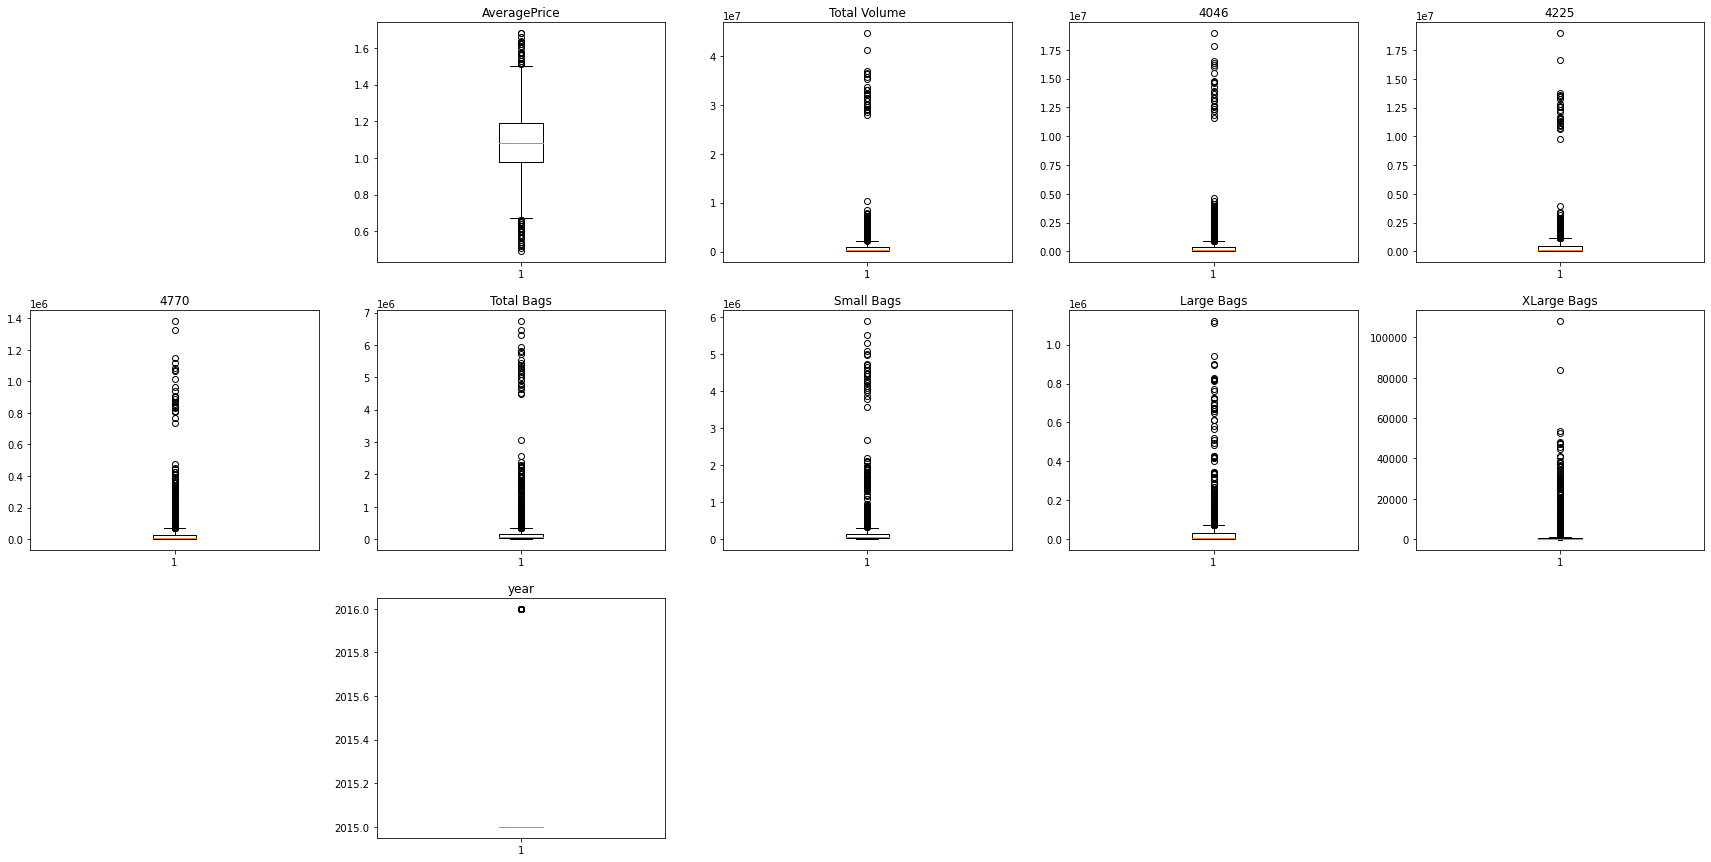

In [113]:
# A crosscheck for outliers usin boxplot
plt.figure(figsize=(30,15))

for i in range(len(df.columns)):
    if df.dtypes[i] != 'object':
        plt.subplot(3,5,i+1)
        plt.boxplot(df[df.columns[i]])
        plt.title(df.columns[i])
plt.show()

Most of the values are concentrated on the 0(y axis), we can see few outliers which are not significant.

In [114]:
# we can see that data is shown as object type so lets convert it to date type
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)
df.head(2)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20


### VISUALISATIONS

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

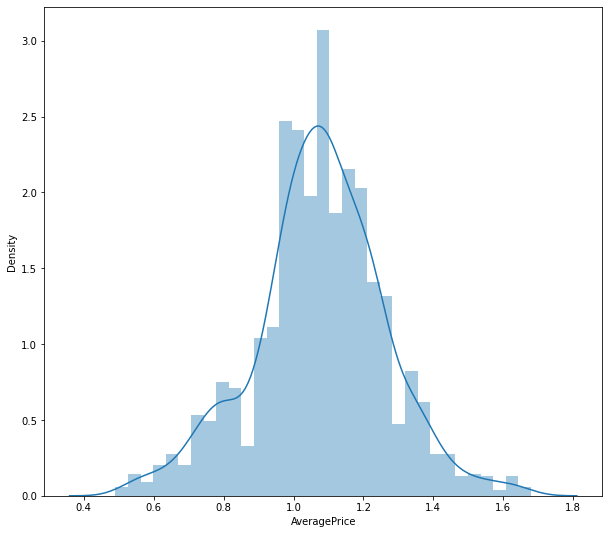

In [115]:
# Distribution of our target variable average price
fig, ax = plt.subplots(figsize=(10, 9))
sns.distplot(df.AveragePrice)

Majorly price of avocado is between 1.0, 1.4.

Text(0.5, 1.0, 'Average Price')

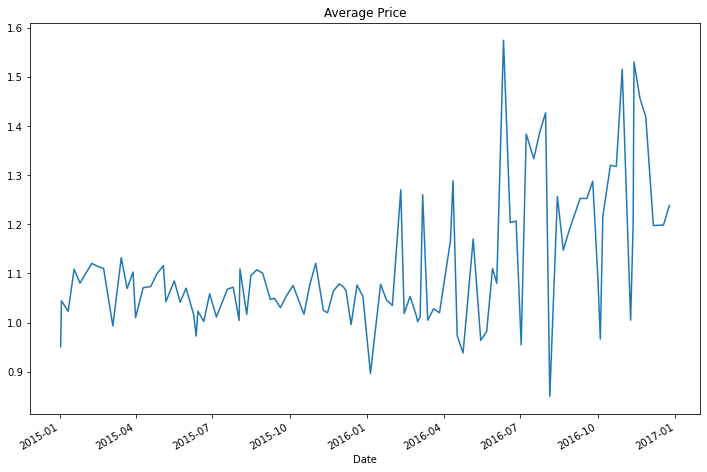

In [116]:
# Avocado's Average Price with respect to the Date
avg_price_date=df.groupby('Date').mean()
plt.figure(figsize=(12,8))
avg_price_date['AveragePrice'].plot()
plt.title('Average Price')

price is higher from year 2016 beginning and through mid of 2016. Its highest upto 2017 beginning.

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

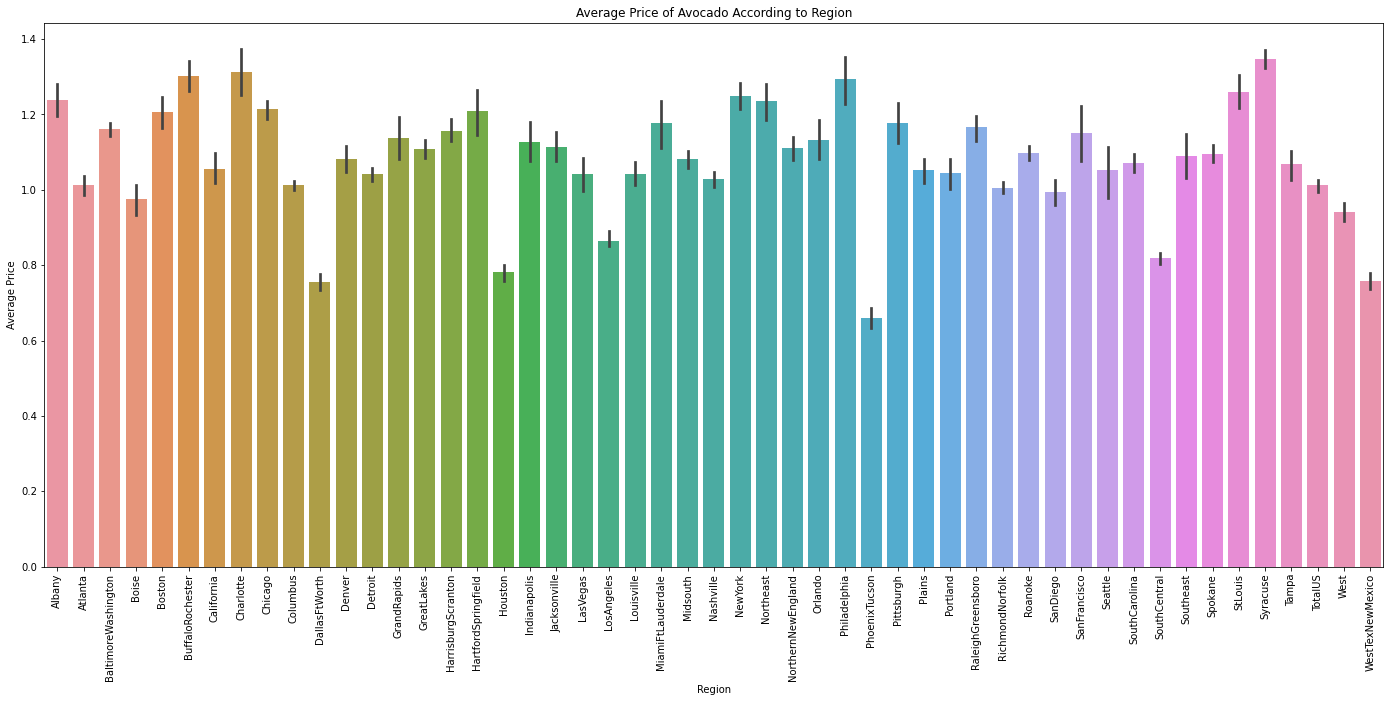

In [117]:
plt.figure(figsize=(24,10))
sns.barplot(y="AveragePrice", x="region", data=df)
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

<AxesSubplot:>

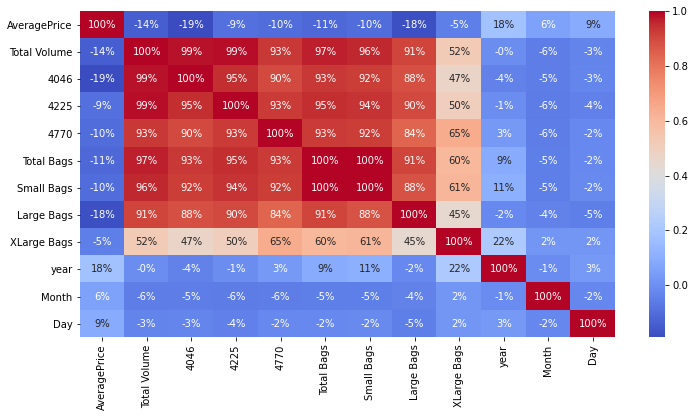

In [118]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True, fmt='.0%')

1. Features are mostly not correleted with the Average Price column, instead most of them are correlated with each other.

In [119]:
# Dropping type column as there is only one type, date column as i have added month,day,year.
# Dropping region column as it can be a bit complex and can affect model.
df_new=pd.get_dummies(df.drop(['region','type','Date'],axis=1),drop_first=True)
df_new.head(2)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20


### MODELLING

In [120]:
# Assigning input and target variables.
y=df_new['AveragePrice']
x=df_new.drop('AveragePrice', axis=1)

In [121]:
# train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

**1. LINEAR REGRESSION**

In [122]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

In [123]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.13276275097935242
MSE: 0.02909072802869966
RMSE: 0.17056004229801205


***OBSERVATIONS***  
1. Mean Square error is very low.
2. RMSE is low as well so our model is trained well.

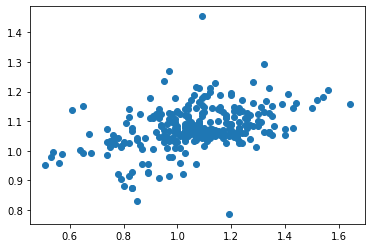

In [124]:
# ytest vs predictions
plt.scatter(x=y_test,y=pred)

**2. DECISION TREE REGRESSION**

In [125]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)

In [126]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.07335526315789473
MSE: 0.010448684210526313
RMSE: 0.10221880556202129


RMSE value is even lower than Linear Regression

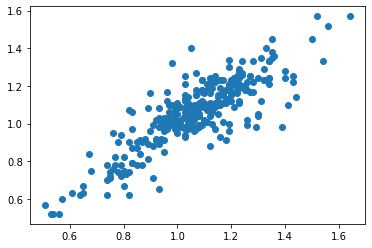

In [127]:
# ytest vs predictions
plt.scatter(x=y_test,y=pred)

**3. RANDOM FOREST REGRESSOR**

In [128]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)

In [129]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.06022203947368423
MSE: 0.0065082596381578995
RMSE: 0.08067378532186215


RMSE is lowest in RadomForestRegressor. So we can save this as the best model.

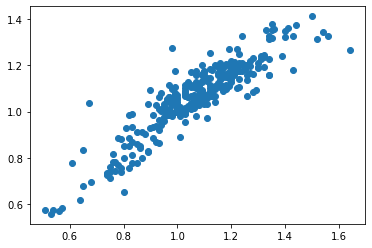

In [130]:
# ytest vs predictions
plt.scatter(x=y_test,y=pred)

### SAVING THE BEST MODEL

In [131]:
import pickle
# save the model to disk
filename = 'best_model_RFR.pkl'
pickle.dump(rfr,open(filename,'wb'))
#Load the model from disk
loaded_model= pickle.load(open(filename,'rb'))
loaded_model.predict(x_test)

array([1.1028, 1.1834, 1.111 , 1.1558, 1.2716, 0.9315, 1.051 , 1.0701,
       1.0786, 0.9409, 1.0683, 1.1433, 1.1892, 0.9824, 1.0968, 0.7775,
       1.0824, 1.0787, 1.1935, 1.1475, 1.1058, 1.1337, 1.0127, 1.377 ,
       1.1679, 0.6193, 1.0388, 0.7793, 1.2091, 0.714 , 1.1977, 1.001 ,
       1.1961, 1.02  , 0.7583, 1.2387, 1.2274, 1.0337, 0.9872, 1.1154,
       1.0289, 1.1899, 1.3597, 1.0404, 0.9125, 1.082 , 1.1728, 1.1033,
       0.8527, 1.0631, 1.3276, 0.9847, 1.2391, 1.0612, 1.0712, 1.1588,
       1.217 , 1.081 , 1.0149, 1.2012, 1.212 , 1.0323, 1.3218, 1.0393,
       1.2141, 0.9111, 0.583 , 1.1153, 0.7357, 1.0978, 1.1847, 0.7694,
       1.0961, 1.0268, 1.0278, 1.1313, 1.1902, 1.2013, 1.2442, 0.8846,
       1.1659, 0.7417, 1.158 , 0.57  , 1.0557, 0.7985, 0.9563, 0.7319,
       1.1363, 1.2521, 1.0389, 1.3176, 1.0894, 1.0576, 1.091 , 1.065 ,
       1.1728, 1.3267, 0.9827, 1.0926, 1.3244, 1.0509, 1.2721, 0.9981,
       1.1453, 0.9852, 1.084 , 1.1974, 1.0304, 1.1792, 1.1029, 1.4106,
      